In [1]:
!pip install plotly
!pip install pyclustering
!pip install networkx matplotlib mpld3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 15.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395106 sha256=cbbb52d1d093979b54e2461e655431b56da81978e9e781c5e17b21c56b62e4d1
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.2/201.2 kB 3.8 MB/s eta 0:00:00


In [19]:
import pandas as pd
import numpy as np
np.random.seed(0)
# Create a list of patient IDs and doctor IDs
patient_ids = range(250)
doctor_ids = range(20)

# Assign specialties to doctors
specialties = ['General Practice', 'Dermatology', 'Neurology', 'Gynecology', 'Cardiology',
               'Orthopedics', 'Urology', 'Pediatrics', 'Psychiatry', 'Oncology', 'Radiology',
               'Anesthesiology', 'Ophthalmology', 'Pathology', 'Otolaryngology']
doctor_specialties = np.random.choice(specialties, size=len(doctor_ids))

# Create a DataFrame to hold the doctor data
doctors = pd.DataFrame({'Doctor ID': doctor_ids, 'Specialty': doctor_specialties})

# Simulate patient visits
num_visits = np.maximum(0, np.random.normal(loc=5, scale=2, size=len(patient_ids)).astype(int))
visits = pd.DataFrame({
    'Patient ID': np.repeat(patient_ids, num_visits),
    'Doctor ID': np.random.choice(doctor_ids, size=num_visits.sum()),
})

# Merge with the doctors DataFrame to get the doctor specialty for each visit
visits = visits.merge(doctors, on='Doctor ID')

# Simulate service utilization
services = {
    'General Practice': ['Check-up', 'Vaccination', 'Flu treatment'],
    'Dermatology': ['Acne treatment', 'Skin biopsy', 'Wart removal'],
    'Neurology': ['Brain MRI', 'EEG', 'Spinal tap'],
    'Gynecology': ['Pap smear', 'Pelvic exam', 'Prenatal care'],
    'Cardiology': ['EKG', 'Cardiac stress test', 'Cardiac catheterization'],
    'Orthopedics': ['Joint injection', 'Bone fracture care', 'Joint replacement surgery'],
    'Urology': ['Cystoscopy', 'Prostate biopsy', 'Bladder scan'],
    'Pediatrics': ['Well-child visit', 'Immunizations', 'Developmental screening'],
    'Psychiatry': ['Psychotherapy', 'Medication management', 'Psychiatric evaluation'],
    'Oncology': ['Chemotherapy', 'Radiation therapy', 'Cancer pain management'],
    'Radiology': ['X-ray', 'MRI', 'Ultrasound'],
    'Anesthesiology': ['General anesthesia', 'Local anesthesia', 'Sedation'],
    'Ophthalmology': ['Eye exam', 'Cataract surgery', 'Glaucoma treatment'],
    'Pathology': ['Lab test review', 'Biopsy evaluation', 'Autopsy'],
    'Otolaryngology': ['Ear examination', 'Tonsillectomy', 'Sinus surgery'],
}
visits['Services'] = visits['Specialty'].apply(lambda x: np.random.choice(services[x]))

# Introduce some errors (inappropriate services)
error_rate = 0.01  # adjust as needed
num_errors = int(error_rate * len(visits))
error_indices = np.random.choice(visits.index, size=num_errors, replace=False)
visits.loc[error_indices, 'Services'] = 'Inappropriate Service'

# Add a new column for fraudulent transactions
visits['Fraudulent'] = 'Normal'
visits.loc[error_indices, 'Fraudulent'] = 'Outlier'

print(visits)

      Patient ID  Doctor ID      Specialty            Services Fraudulent
0              0          8     Gynecology       Prenatal care     Normal
1              1          8     Gynecology       Prenatal care     Normal
2              4          8     Gynecology       Prenatal care     Normal
3              5          8     Gynecology       Prenatal care     Normal
4             12          8     Gynecology         Pelvic exam     Normal
...          ...        ...            ...                 ...        ...
1134         211         16  Ophthalmology  Glaucoma treatment     Normal
1135         212         16  Ophthalmology    Cataract surgery     Normal
1136         220         16  Ophthalmology    Cataract surgery     Normal
1137         226         16  Ophthalmology            Eye exam     Normal
1138         227         16  Ophthalmology            Eye exam     Normal

[1139 rows x 5 columns]


In [3]:
visits.to_excel('chk.xlsx')

In [ ]:
### incase of adding custom data
import pandas as pd
import numpy as np
visits = pd.read_excel('/content/CMS_ASSOCIATION.xlsx')
visits

In [ ]:
import pandas as pd
import numpy as np

visits = pd.read_excel('/content/CMS_ASSOCIATION.xlsx')

# Get 25% of rows
limit = len(visits) // 50

visits[:limit]

# Or use .sample() to get a random 25%
#visits = visits.sample(frac=0.25)

In [52]:
visits = visits[:limit]
visits

,Patient ID,Doctor ID,Specialty,Services
0,0002A284C4E42048,0300ZU,36631,83615
1,0002A284C4E42048,0300PH,568,71010
2,0002A284C4E42048,0300RK,78907,930059076799285
4,0002A284C4E42048,0300RK,5300,4323999215116410226212864
5,0002A284C4E42048,5000YH,71514,826078753684443
...,...,...,...,...
6357,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336
6358,01F32FADB3A91E99,5000KV,78604,86901
6358,01F32FADB3A91E99,5000KV,78604,83615
6358,01F32FADB3A91E99,5000KV,78604,C1769


In [53]:
visits.shape

(15827, 4)

In [54]:
#### incase of exploding a dataframe of vistis "call it visitis exclusivley then run all the remaining cells"
# Drop rows where 'Services' is NaN
visits = visits.dropna(subset=['Services'])

# Ensure 'Services' is of string type
visits['Services'] = visits['Services'].astype(str)

# Split the 'Services' column on commas and explode the resulting lists
visits['Services'] = visits['Services'].str.split(',')
visits = visits.explode('Services')
visits

,Patient ID,Doctor ID,Specialty,Services
0,0002A284C4E42048,0300ZU,36631,83615
1,0002A284C4E42048,0300PH,568,71010
2,0002A284C4E42048,0300RK,78907,930059076799285
4,0002A284C4E42048,0300RK,5300,4323999215116410226212864
5,0002A284C4E42048,5000YH,71514,826078753684443
...,...,...,...,...
6357,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336
6358,01F32FADB3A91E99,5000KV,78604,86901
6358,01F32FADB3A91E99,5000KV,78604,83615
6358,01F32FADB3A91E99,5000KV,78604,C1769


In [55]:
df = visits
df

,Patient ID,Doctor ID,Specialty,Services
0,0002A284C4E42048,0300ZU,36631,83615
1,0002A284C4E42048,0300PH,568,71010
2,0002A284C4E42048,0300RK,78907,930059076799285
4,0002A284C4E42048,0300RK,5300,4323999215116410226212864
5,0002A284C4E42048,5000YH,71514,826078753684443
...,...,...,...,...
6357,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336
6358,01F32FADB3A91E99,5000KV,78604,86901
6358,01F32FADB3A91E99,5000KV,78604,83615
6358,01F32FADB3A91E99,5000KV,78604,C1769


In [56]:
# Calculate the number of times each patient checked by each doctor
patient_counts = df.groupby(['Doctor ID', 'Patient ID']).size()

# Calculate the total number of patients checked by each doctor
doctor_totals = df.groupby('Doctor ID')['Patient ID'].count()

# Calculate the number of times each patient visited each doctor
patient_visits = df.groupby(['Doctor ID', 'Patient ID']).size()

# Calculate the total number of visits by each patient
patient_totals = df.groupby('Patient ID')['Doctor ID'].count()

In [57]:
# Calculate the Doctor (Association score) Y
df['Doctor_Association_Score'] = df.apply(lambda row: patient_counts[(row['Doctor ID'], row['Patient ID'])] / doctor_totals[row['Doctor ID']], axis=1)

# Calculate the Patient (Association score) F
df['Patient_Association_Score'] = df.apply(lambda row: patient_visits[(row['Doctor ID'], row['Patient ID'])] / patient_totals[row['Patient ID']], axis=1)

In [58]:
# Group the data by 'Doctor ID' and 'Services'
grouped_data = df.groupby(['Doctor ID', 'Services'])

# Count the occurrences of each combination
service_counts = grouped_data['Patient ID'].count().reset_index()

# Calculate the total number of patients checked by each doctor
doctor_patients = df.groupby('Doctor ID')['Patient ID'].nunique().reset_index()

# Merge the counts and doctor patients data
service_association_data = pd.merge(service_counts, doctor_patients, on='Doctor ID')

In [59]:
# Calculate the 'services association score'
service_association_data['Services Association Score'] = service_association_data['Patient ID_x'] / service_association_data['Patient ID_y']

# Merge the association scores with the original data
data = pd.merge(df, service_association_data[['Doctor ID', 'Services', 'Services Association Score']], on=['Doctor ID', 'Services'], how='left')

In [60]:
data['Z'] = (data['Doctor_Association_Score'] + data['Patient_Association_Score'] + data['Services Association Score']) / 3

In [61]:
data

,Patient ID,Doctor ID,Specialty,Services,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z
0,0002A284C4E42048,0300ZU,36631,83615,0.333333,0.013889,0.333333,0.226852
1,0002A284C4E42048,0300PH,568,71010,0.500000,0.013889,0.500000,0.337963
2,0002A284C4E42048,0300RK,78907,930059076799285,0.680000,0.944444,0.333333,0.652593
3,0002A284C4E42048,0300RK,5300,4323999215116410226212864,0.680000,0.944444,0.333333,0.652593
4,0002A284C4E42048,5000YH,71514,826078753684443,0.016129,0.013889,0.200000,0.076673
...,...,...,...,...,...,...,...,...
15822,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336,0.250000,1.000000,0.333333,0.527778
15823,01F32FADB3A91E99,5000KV,78604,86901,0.153846,1.000000,0.500000,0.551282
15824,01F32FADB3A91E99,5000KV,78604,83615,0.153846,1.000000,0.500000,0.551282
15825,01F32FADB3A91E99,5000KV,78604,C1769,0.153846,1.000000,0.500000,0.551282


In [13]:
data.to_excel('chk_2.xlsx')

In [62]:
data

,Patient ID,Doctor ID,Specialty,Services,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z
0,0002A284C4E42048,0300ZU,36631,83615,0.333333,0.013889,0.333333,0.226852
1,0002A284C4E42048,0300PH,568,71010,0.500000,0.013889,0.500000,0.337963
2,0002A284C4E42048,0300RK,78907,930059076799285,0.680000,0.944444,0.333333,0.652593
3,0002A284C4E42048,0300RK,5300,4323999215116410226212864,0.680000,0.944444,0.333333,0.652593
4,0002A284C4E42048,5000YH,71514,826078753684443,0.016129,0.013889,0.200000,0.076673
...,...,...,...,...,...,...,...,...
15822,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336,0.250000,1.000000,0.333333,0.527778
15823,01F32FADB3A91E99,5000KV,78604,86901,0.153846,1.000000,0.500000,0.551282
15824,01F32FADB3A91E99,5000KV,78604,83615,0.153846,1.000000,0.500000,0.551282
15825,01F32FADB3A91E99,5000KV,78604,C1769,0.153846,1.000000,0.500000,0.551282


In [63]:
import plotly.express as px

# Assuming df is your DataFrame.
df = data

fig = px.box(df, y=['Doctor_Association_Score', 'Patient_Association_Score', 'Services Association Score', 'Z'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

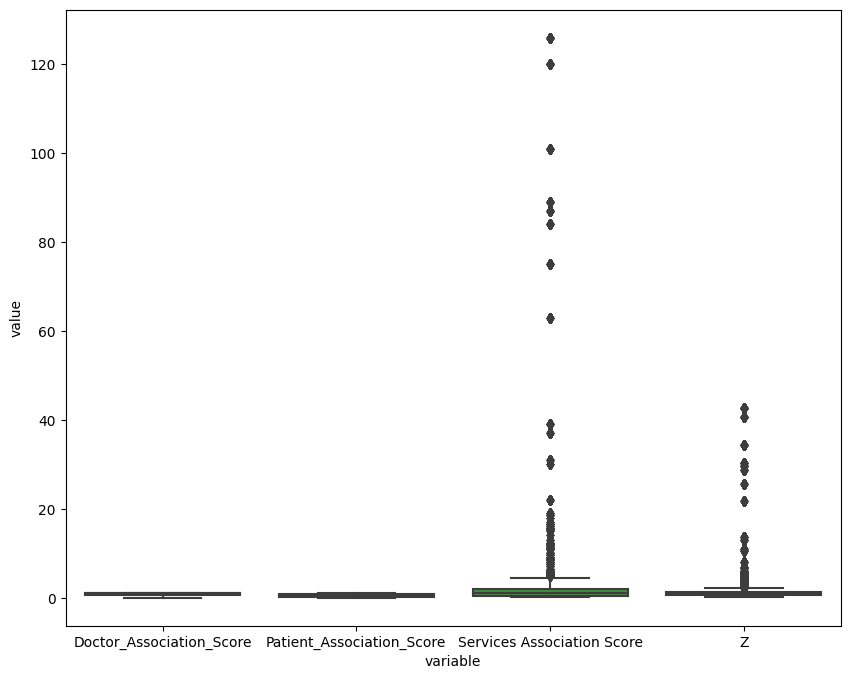

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame.
df = data
# Melt the DataFrame to a long format
df_melt = pd.melt(df, value_vars=['Doctor_Association_Score', 'Patient_Association_Score', 'Services Association Score', 'Z'])

# Create a box plot for each variable
plt.figure(figsize=(10,8))
sns.boxplot(x='variable', y='value', data=df_melt)
plt.show()

In [65]:
# Calculate the average association scores for each provider, service, and patient
provider_avg_score = data.groupby('Doctor ID')['Doctor_Association_Score'].mean()
service_avg_score = data.groupby('Services')['Services Association Score'].mean()
patient_avg_score = data.groupby('Patient ID')['Patient_Association_Score'].mean()

# Set up a dictionary to hold thresholds
thresholds = {}

# Calculate the Interquartile Range (IQR) and thresholds for each column
for column in ['Doctor_Association_Score', 'Patient_Association_Score', 'Services Association Score', 'Z']:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the minimum and maximum threshold values (lower and upper fences)
    min_threshold = Q1 - 1.5 * IQR
    max_threshold = Q3 + 1.5 * IQR

    thresholds[column] = (min_threshold, max_threshold)

# Classify the transactions as normal or outliers
data['Transaction_Status'] = 'Normal'  # Initialize the transaction status column
for index, row in data.iterrows():
    for column in ['Doctor_Association_Score', 'Patient_Association_Score', 'Services Association Score', 'Z']:
        score = row[column]
        min_threshold, max_threshold = thresholds[column]

        if score < min_threshold or score > max_threshold:
            data.loc[index, 'Transaction_Status'] = 'need_to_investigate'
            break  # No need to check other columns if one is already an outlier

In [66]:
# Assuming df is your DataFrame.
data = data.dropna()

In [67]:
data

,Patient ID,Doctor ID,Specialty,Services,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z,Transaction_Status
0,0002A284C4E42048,0300ZU,36631,83615,0.333333,0.013889,0.333333,0.226852,Normal
1,0002A284C4E42048,0300PH,568,71010,0.500000,0.013889,0.500000,0.337963,Normal
2,0002A284C4E42048,0300RK,78907,930059076799285,0.680000,0.944444,0.333333,0.652593,Normal
3,0002A284C4E42048,0300RK,5300,4323999215116410226212864,0.680000,0.944444,0.333333,0.652593,Normal
4,0002A284C4E42048,5000YH,71514,826078753684443,0.016129,0.013889,0.200000,0.076673,Normal
...,...,...,...,...,...,...,...,...,...
15822,01F328EF76367A43,5100AP,V4976,857308260782042943033847054336,0.250000,1.000000,0.333333,0.527778,Normal
15823,01F32FADB3A91E99,5000KV,78604,86901,0.153846,1.000000,0.500000,0.551282,Normal
15824,01F32FADB3A91E99,5000KV,78604,83615,0.153846,1.000000,0.500000,0.551282,Normal
15825,01F32FADB3A91E99,5000KV,78604,C1769,0.153846,1.000000,0.500000,0.551282,Normal


In [20]:
data.to_excel('chk_3.xlsx')

In [ ]:
# run the next chunk instead of this chunk if the data size is big
# sns takes lower ram than plotly
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
from tqdm import tqdm
# Assuming df is your DataFrame.
df = data

# Select the columns to include in the model
numeric_data = df[['Doctor_Association_Score', 'Patient_Association_Score',
                   'Services Association Score', 'Z']]

# Fit GMMs with increasing number of components
n_components = np.arange(1, 400)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(numeric_data)
          for n in tqdm(n_components, desc="Searching_for_Gaussian_Clusters")]

# Use BIC to determine the best number of components
bic = [m.bic(numeric_data) for m in models]
best_index = np.argmin(bic)
best_gmm = models[best_index]
print("Best number of components: ", best_index+1)

# Predict the clusters
labels = best_gmm.predict(numeric_data)

# Create a copy of the original data
frame = df.copy()

# Add the cluster labels to the DataFrame
frame['cluster'] = labels   # Add 1 to make the cluster numbers start from 1

# Create a 3D scatter plot
fig = go.Figure()

for k in range(best_index):
    clustered_data = frame[frame["cluster"]==k]  # Note the "+1" here
    fig.add_trace(go.Scatter3d(
        x=clustered_data['Doctor_Association_Score'],
        y=clustered_data['Patient_Association_Score'],
        z=clustered_data['Services Association Score'],
        text=clustered_data.apply(lambda row: f'Doctor ID: {row["Doctor ID"]}<br>Specialty: {row["Specialty"]}<br>Services: {row["Services"]}<br>Cluster: {row["cluster"]}', axis=1),
        mode='markers',
        marker=dict(
            size=6,
            line=dict(color='rgba(217, 217, 217, 0.14)', width=0.5),
            opacity=0.8),
        hovertemplate='%{text}',
        name=f'Cluster {k}'  # Note the "+1" here
    ))

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Searching_for_Gaussian_Clusters:  64%|██████▎   | 254/399 [59:55<1:08:37, 28.40s/it]

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame.
df = data

# Select the columns to include in the model
numeric_data = df[['Doctor_Association_Score', 'Patient_Association_Score',
                   'Services Association Score', 'Z']]

# Fit GMMs with increasing number of components
n_components = np.arange(1, 300)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(numeric_data)
          for n in tqdm(n_components, desc="Searching_for_Gaussian_Clusters")]

# Use BIC to determine the best number of components
bic = [m.bic(numeric_data) for m in models]
best_index = np.argmin(bic)
best_gmm = models[best_index]
print("Best number of components: ", best_index+1)

# Predict the clusters
labels = best_gmm.predict(numeric_data)

# Create a copy of the original data
frame = df.copy()

# Add the cluster labels to the DataFrame
frame['cluster'] = labels   # Add 1 to make the cluster numbers start from 1

# Create a seaborn pairplot
sns.set(style="ticks")
sns.pairplot(frame, hue="cluster", palette="Spectral")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
from scipy.spatial import distance

# Assuming df is your DataFrame.
df = data

# Select the columns to include in the model
numeric_data = df[['Doctor_Association_Score', 'Patient_Association_Score', 'Services Association Score', 'Z']]

# Fit GMMs with increasing number of components
n_components = np.arange(1, 300)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(numeric_data)
          for n in n_components]

# Use BIC to determine the best number of components
bic = [m.bic(numeric_data) for m in models]
best_index = np.argmin(bic)
best_gmm = models[best_index]
print("Best number of components: ", best_index+1)

# Predict the clusters
labels = best_gmm.predict(numeric_data)

# Create a copy of the original data
frame = df.copy()

# Add the cluster labels to the DataFrame
frame['cluster'] = labels

# Add centroid and distance to DataFrame
centroids = best_gmm.means_
frame['centroid'] = frame['cluster'].apply(lambda x: centroids[x])
frame['distance_to_centroid'] = frame.apply(lambda row: distance.euclidean(row[numeric_data.columns], row['centroid']), axis=1)

# Print the new DataFrame with cluster number, centroid, and distance from centroid
print(frame)

In [37]:
frame

,Patient ID,Doctor ID,Specialty,Services,Fraudulent,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z,Transaction_Status,cluster
0,0,8,Gynecology,Prenatal care,Normal,0.021739,0.250000,0.476190,0.249310,Normal,15
1,1,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23
2,4,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23
3,5,8,Gynecology,Prenatal care,Normal,0.021739,0.500000,0.476190,0.332643,need_to_investigate,1
4,12,8,Gynecology,Pelvic exam,Normal,0.021739,0.166667,0.285714,0.158040,Normal,2
...,...,...,...,...,...,...,...,...,...,...,...
1134,211,16,Ophthalmology,Glaucoma treatment,Normal,0.031250,0.400000,0.457627,0.296292,need_to_investigate,9
1135,212,16,Ophthalmology,Cataract surgery,Normal,0.015625,0.200000,0.254237,0.156621,Normal,5
1136,220,16,Ophthalmology,Cataract surgery,Normal,0.015625,0.250000,0.254237,0.173287,Normal,15
1137,226,16,Ophthalmology,Eye exam,Normal,0.015625,1.000000,0.355932,0.457186,need_to_investigate,3


In [24]:
frame.to_excel('ch_4.xlsx')

In [38]:
# Compute the total number of services in each cluster
cluster_totals = frame.groupby('cluster')['Services'].transform('count')

# Compute the number of times each service is provided in each cluster
service_cluster_counts = frame.groupby(['cluster', 'Services'])['Services'].transform('count')

# Compute the number of times each service is provided by each doctor within each cluster
doctor_service_cluster_counts = frame.groupby(['cluster', 'Doctor ID', 'Services'])['Services'].transform('count')

# Compute the support values and assign them to a new column in the DataFrame
frame['Support'] = service_cluster_counts / cluster_totals

# Compute the confidence values and assign them to a new column in the DataFrame
frame['Confidence'] = doctor_service_cluster_counts / service_cluster_counts

print(frame)

      Patient ID  Doctor ID      Specialty            Services Fraudulent  \
0              0          8     Gynecology       Prenatal care     Normal   
1              1          8     Gynecology       Prenatal care     Normal   
2              4          8     Gynecology       Prenatal care     Normal   
3              5          8     Gynecology       Prenatal care     Normal   
4             12          8     Gynecology         Pelvic exam     Normal   
...          ...        ...            ...                 ...        ...   
1134         211         16  Ophthalmology  Glaucoma treatment     Normal   
1135         212         16  Ophthalmology    Cataract surgery     Normal   
1136         220         16  Ophthalmology    Cataract surgery     Normal   
1137         226         16  Ophthalmology            Eye exam     Normal   
1138         227         16  Ophthalmology            Eye exam     Normal   

      Doctor_Association_Score  Patient_Association_Score  \
0             

In [39]:
frame

,Patient ID,Doctor ID,Specialty,Services,Fraudulent,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z,Transaction_Status,cluster,Support,Confidence
0,0,8,Gynecology,Prenatal care,Normal,0.021739,0.250000,0.476190,0.249310,Normal,15,0.050847,0.222222
1,1,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23,0.070175,0.625000
2,4,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23,0.070175,0.625000
3,5,8,Gynecology,Prenatal care,Normal,0.021739,0.500000,0.476190,0.332643,need_to_investigate,1,0.155556,0.428571
4,12,8,Gynecology,Pelvic exam,Normal,0.021739,0.166667,0.285714,0.158040,Normal,2,0.108108,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,211,16,Ophthalmology,Glaucoma treatment,Normal,0.031250,0.400000,0.457627,0.296292,need_to_investigate,9,0.073171,0.666667
1135,212,16,Ophthalmology,Cataract surgery,Normal,0.015625,0.200000,0.254237,0.156621,Normal,5,0.028037,0.666667
1136,220,16,Ophthalmology,Cataract surgery,Normal,0.015625,0.250000,0.254237,0.173287,Normal,15,0.039548,0.285714
1137,226,16,Ophthalmology,Eye exam,Normal,0.015625,1.000000,0.355932,0.457186,need_to_investigate,3,0.166667,1.000000


In [27]:
frame.to_excel('chk_5.xlsx')

In [40]:
# for big sized data use sns instead of plotly (next snippet)
import plotly.subplots as sp
import plotly.graph_objs as go

# Create box plots for 'Confidence' and 'Support'
trace_confidence = go.Box(y=frame['Confidence'], name='Confidence')
trace_support = go.Box(y=frame['Support'], name='Support')

# Create a subplot with 1 row and 2 columns
fig = sp.make_subplots(rows=1, cols=2)

# Add the box plots to the subplot
fig.add_trace(trace_confidence, row=1, col=1)
fig.add_trace(trace_support, row=1, col=2)

# Show the subplot
fig.show()

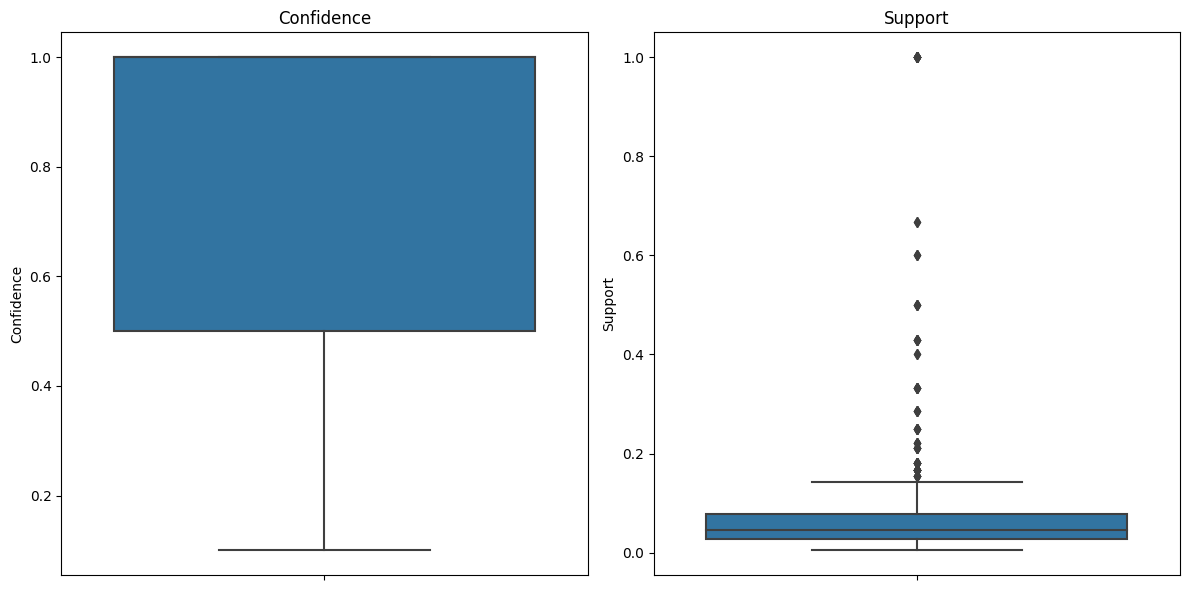

In [41]:
# for big sized data use sns instead of plotly
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create box plot for 'Confidence'
sns.boxplot(y=frame['Confidence'], ax=axs[0])
axs[0].set_title('Confidence')

# Create box plot for 'Support'
sns.boxplot(y=frame['Support'], ax=axs[1])
axs[1].set_title('Support')

# Show the plot
plt.tight_layout()
plt.show()

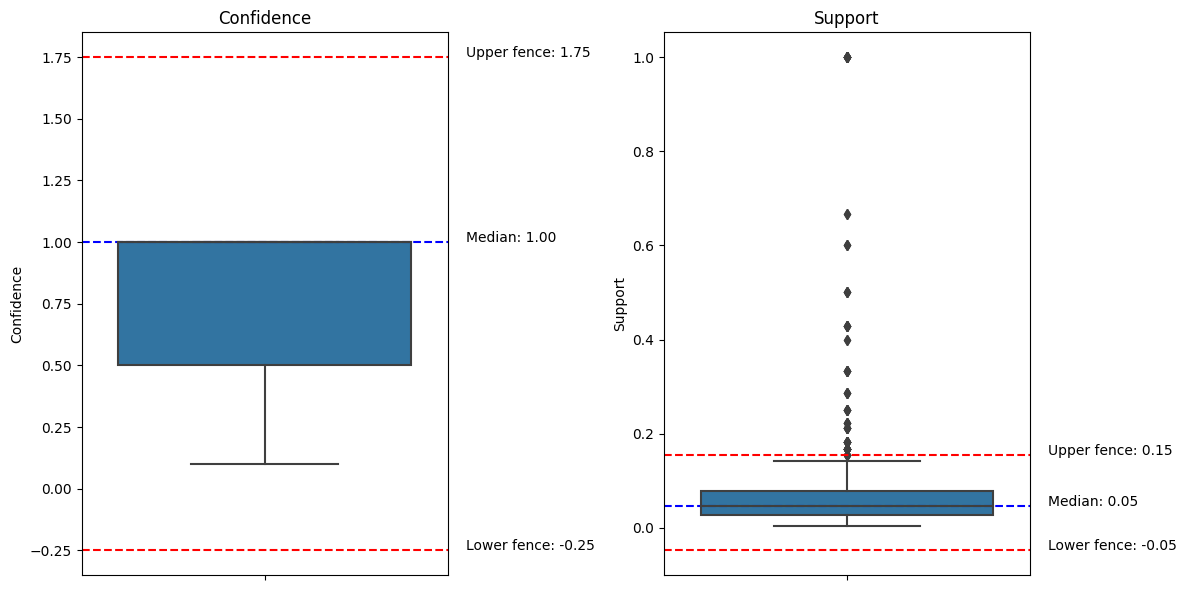

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 2 subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Create box plot for 'Confidence'
sns.boxplot(y=frame['Confidence'], ax=axs[0])
axs[0].set_title('Confidence')

# Calculate the median and interquartile range for 'Confidence'
Q1_confidence = frame['Confidence'].quantile(0.25)
Q3_confidence = frame['Confidence'].quantile(0.75)
IQR_confidence = Q3_confidence - Q1_confidence

# Add the median and fence values to the 'Confidence' plot
axs[0].axhline(Q1_confidence - 1.5 * IQR_confidence, ls='--', color='red')
axs[0].axhline(Q3_confidence + 1.5 * IQR_confidence, ls='--', color='red')
axs[0].axhline(frame['Confidence'].median(), ls='--', color='blue')

# Add text
axs[0].text(0.55, Q1_confidence - 1.5 * IQR_confidence, 'Lower fence: {:.2f}'.format(Q1_confidence - 1.5 * IQR_confidence))
axs[0].text(0.55, Q3_confidence + 1.5 * IQR_confidence, 'Upper fence: {:.2f}'.format(Q3_confidence + 1.5 * IQR_confidence))
axs[0].text(0.55, frame['Confidence'].median(), 'Median: {:.2f}'.format(frame['Confidence'].median()))

# Create box plot for 'Support'
sns.boxplot(y=frame['Support'], ax=axs[1])
axs[1].set_title('Support')

# Calculate the median and interquartile range for 'Support'
Q1_support = frame['Support'].quantile(0.25)
Q3_support = frame['Support'].quantile(0.75)
IQR_support = Q3_support - Q1_support

# Add the median and fence values to the 'Support' plot
axs[1].axhline(Q1_support - 1.5 * IQR_support, ls='--', color='red')
axs[1].axhline(Q3_support + 1.5 * IQR_support, ls='--', color='red')
axs[1].axhline(frame['Support'].median(), ls='--', color='blue')

# Add text
axs[1].text(0.55, Q1_support - 1.5 * IQR_support, 'Lower fence: {:.2f}'.format(Q1_support - 1.5 * IQR_support))
axs[1].text(0.55, Q3_support + 1.5 * IQR_support, 'Upper fence: {:.2f}'.format(Q3_support + 1.5 * IQR_support))
axs[1].text(0.55, frame['Support'].median(), 'Median: {:.2f}'.format(frame['Support'].median()))

# Show the plot
plt.tight_layout()
plt.show()

In [43]:
# Calculate quartiles and IQR for 'Confidence' and 'Support'
Q1_confidence = frame['Confidence'].quantile(0.25)
Q3_confidence = frame['Confidence'].quantile(0.75)
IQR_confidence = Q3_confidence - Q1_confidence

Q1_support = frame['Support'].quantile(0.25)
Q3_support = frame['Support'].quantile(0.75)
IQR_support = Q3_support - Q1_support

# Define lower and upper fences
lower_fence_confidence = Q1_confidence - 1.5 * IQR_confidence
upper_fence_confidence = Q3_confidence + 1.5 * IQR_confidence

lower_fence_support = Q1_support - 1.5 * IQR_support
upper_fence_support = Q3_support + 1.5 * IQR_support

# Filter the DataFrame based on these fences
filtered_frame = frame[(frame['Confidence'] >= lower_fence_confidence) &
                       (frame['Confidence'] <= upper_fence_confidence) &
                       (frame['Support'] >= lower_fence_support) &
                       (frame['Support'] <= upper_fence_support)]

In [44]:
lower_fence_confidence

-0.25

In [45]:
filtered_frame

,Patient ID,Doctor ID,Specialty,Services,Fraudulent,Doctor_Association_Score,Patient_Association_Score,Services Association Score,Z,Transaction_Status,cluster,Support,Confidence
0,0,8,Gynecology,Prenatal care,Normal,0.021739,0.250000,0.476190,0.249310,Normal,15,0.050847,0.222222
1,1,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23,0.070175,0.625000
2,4,8,Gynecology,Prenatal care,Normal,0.021739,0.142857,0.476190,0.213596,Normal,23,0.070175,0.625000
4,12,8,Gynecology,Pelvic exam,Normal,0.021739,0.166667,0.285714,0.158040,Normal,2,0.108108,0.250000
5,18,8,Gynecology,Prenatal care,Normal,0.021739,0.166667,0.476190,0.221532,Normal,28,0.086957,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,205,16,Ophthalmology,Glaucoma treatment,Normal,0.015625,0.200000,0.457627,0.224417,Normal,5,0.037383,0.625000
1133,211,16,Ophthalmology,Eye exam,Normal,0.031250,0.400000,0.355932,0.262394,need_to_investigate,9,0.024390,1.000000
1134,211,16,Ophthalmology,Glaucoma treatment,Normal,0.031250,0.400000,0.457627,0.296292,need_to_investigate,9,0.073171,0.666667
1135,212,16,Ophthalmology,Cataract surgery,Normal,0.015625,0.200000,0.254237,0.156621,Normal,5,0.028037,0.666667


In [46]:
# Create a list to hold the rules
rules_list = []

# Set the range for confidence_threshold and support_threshold
confidence_min = 0.5
confidence_max = 1
support_min = 0.05
support_max = 0.15

# Iterate over each unique specialty-service pair in the filtered DataFrame
for (specialty, service), group in filtered_frame.groupby(['Specialty', 'Services']):
    # Calculate the mean confidence and support values for the current pair
    mean_confidence = group['Confidence'].mean()
    mean_support = group['Support'].mean()

    # Check if mean values are within defined range, if not, set them to the range limit
    if mean_confidence < confidence_min:
        mean_confidence = confidence_min
    elif mean_confidence > confidence_max:
        mean_confidence = confidence_max

    if mean_support < support_min:
        mean_support = support_min
    elif mean_support > support_max:
        mean_support = support_max

    # Add the current rule to the list
    rules_list.append([specialty, service, mean_confidence, mean_support])

# Convert the list of rules into a DataFrame
rules = pd.DataFrame(rules_list, columns=['Specialty', 'Service', 'Confidence Threshold', 'Support Threshold'])

rules

,Specialty,Service,Confidence Threshold,Support Threshold
0,Anesthesiology,General anesthesia,1.000000,0.050000
1,Anesthesiology,Local anesthesia,1.000000,0.050000
2,Anesthesiology,Sedation,1.000000,0.050000
3,Cardiology,Cardiac catheterization,1.000000,0.050000
4,Cardiology,Cardiac stress test,1.000000,0.050000
5,Cardiology,EKG,1.000000,0.050000
6,Dermatology,Acne treatment,1.000000,0.050000
7,Dermatology,Skin biopsy,1.000000,0.050000
8,Dermatology,Wart removal,1.000000,0.050000
9,General Practice,Check-up,1.000000,0.050000


In [47]:
rules.to_excel('29_cluster.xlsx')

In [36]:
rules.to_excel('cms_25_percentage_rules.xlsx')

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import mpld3

# Load the rules dataframe into a Pandas DataFrame
df = rules

# Create a graph object using networkx.DiGraph()
G = nx.DiGraph()

# Add nodes to the graph using add_node() method
for specialty in df['Specialty']:
    G.add_node(specialty)

# Add edges to the graph using add_edge() method
for i, row in df.iterrows():
    G.add_edge(row['Specialty'], row['Service'])

# Customize node and edge properties
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=pos, node_color='lightblue', node_size=500, alpha=0.8)
nx.draw_networkx_edges(G, pos=pos, edge_color='gray', alpha=0.5)
nx.draw_networkx_labels(G, pos=pos, font_size=12, font_weight='bold')

# Make the graph interactive with mpld3
fig, ax = plt.subplots(figsize=(8, 6))
labels = df[['Specialty', 'Service']].apply(lambda x: ': '.join(x), axis=1).tolist()
tooltip = mpld3.plugins.PointLabelTooltip(G.nodes, labels=labels)
mpld3.plugins.connect(fig, tooltip)
mpld3.enable_notebook()
mpld3.display()

# Show the plot
plt.show()

In [39]:
import pandas as pd
import plotly.graph_objects as go
import networkx as nx

# Load the rules dataframe into a Pandas DataFrame
df = rules

# Create a graph object using networkx.DiGraph()
G = nx.from_pandas_edgelist(df, 'Specialty', 'Service', create_using=nx.DiGraph())

# Position nodes using Fruchterman-Reingold force-directed algorithm
pos = nx.spring_layout(G, seed=42)

# Create Edges
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])
edge_trace = go.Scatter(x=edge_x, y=edge_y, line=dict(width=0.5, color='#888'), hoverinfo='none', mode='lines')

# Create Nodes
node_x = [pos[k][0] for k in G.nodes()]
node_y = [pos[k][1] for k in G.nodes()]
node_trace = go.Scatter(x=node_x, y=node_y, mode='markers', hoverinfo='text',
                        marker=dict(showscale=True, colorscale='YlGnBu', reversescale=True, color=[], size=10,
                                    colorbar=dict(thickness=15, title='Node Connections', xanchor='left', titleside='right'),
                                    line_width=2))

# Color Node Points
node_adjacencies = []
for node, adjacencies in enumerate(G.adjacency()):
    node_adjacencies.append(len(adjacencies[1]))
node_trace.marker.color = node_adjacencies

# Hover Text
node_text = []
for node in G.nodes():
    adjacencies = G.adj[node]
    node_text.append(f'{node}<br># of connections: {len(adjacencies)}')
node_trace.text = node_text

# Create Network Graph
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Network graph made with Python',
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()